In [1]:
import numpy as np
from astropy.io import fits
from astropy import units as u
from spectral_cube import SpectralCube as sc
from matplotlib import pyplot as plt
from pathlib import Path
from astropy.wcs import WCS

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes

from astropy.visualization.wcsaxes import add_beam

from astropy.table import Table

import pyregion
import pandas as pd
from astropy.visualization.wcsaxes import add_scalebar
from matplotlib.colors import rgb2hex, Normalize, LogNorm, PowerNorm
from matplotlib.colorbar import ColorbarBase

In [11]:
'''font = 'Times New Roman'
plt.rcParams['font.size'] = 28
plt.rcParams['font.family'] = font
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = font
plt.rcParams['mathtext.it'] = font + ':italic'
plt.rcParams['mathtext.bf'] = font + ':bold'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'''

"font = 'Times New Roman'\nplt.rcParams['font.size'] = 28\nplt.rcParams['font.family'] = font\nplt.rcParams['mathtext.fontset'] = 'custom'\nplt.rcParams['mathtext.rm'] = font\nplt.rcParams['mathtext.it'] = font + ':italic'\nplt.rcParams['mathtext.bf'] = font + ':bold'\nplt.rcParams['figure.facecolor'] = 'white'\nplt.rcParams['xtick.direction'] = 'out'\nplt.rcParams['ytick.direction'] = 'out"

In [17]:
#hdu_12 = fits.open("C:\\Users\\alexf\Japan internship\\NRO45_13CO_Tmb_0p33kms_21.5arcsec.vrad.fits.fits")[0]
hdu_13 = fits.open("C:\\Users\\alexf\Japan internship\\NRO_13CO.vrad&restfreq.fits")[0]
#hdu_18 = fits.open("C:\\Users\\alexf\Japan internship\\NRO_C18O.vrad&restfreq.fits")[0]
#print(hdu_18)
'''
hdu_12.header["BMAJ"] = 14/3600
hdu_12.header["BMIN"] = 14/3600
hdu_12.header["BPA"] = 0
cube_12 = sc.read(hdu_12)
'''
hdu_13.header["BMAJ"] = 14/3600
hdu_13.header["BMIN"] = 14/3600
hdu_13.header["BPA"] = 0
cube_13 = sc.read(hdu_13)
'''
hdu_18.header["BMAJ"] = 14/3600
hdu_18.header["BMIN"] = 14/3600
hdu_18.header["BPA"] = 0
cube_18 = sc.read(hdu_18)
'''
def scalebarlength(distance, pc):
    angle = np.arctan((pc*u.pc)/(distance*2*u.pc))
    return angle

angle = scalebarlength(235, 1).to(u.deg).value

In [13]:
'''# Select a smaller region of the cubes based on x and y bounds
cube_12 = cube_12.subcube(xlo=(52.3-0.52)*u.deg, xhi=(52.3+0.52)*u.deg, ylo=(31.5-1.45/2)*u.deg, yhi=(31.5+1.45/2)*u.deg)
cube_13 = cube_13.subcube(xlo=(52.3-0.52)*u.deg, xhi=(52.3+0.52)*u.deg, ylo=(31.5-1.45/2)*u.deg, yhi=(31.5+1.45/2)*u.deg)
cube_18 = cube_18.subcube(xlo=(52.3-0.52)*u.deg, xhi=(52.3+0.52)*u.deg, ylo=(31.5-1.45/2)*u.deg, yhi=(31.5+1.45/2)*u.deg)'''

'# Select a smaller region of the cubes based on x and y bounds\ncube_12 = cube_12.subcube(xlo=(52.3-0.52)*u.deg, xhi=(52.3+0.52)*u.deg, ylo=(31.5-1.45/2)*u.deg, yhi=(31.5+1.45/2)*u.deg)\ncube_13 = cube_13.subcube(xlo=(52.3-0.52)*u.deg, xhi=(52.3+0.52)*u.deg, ylo=(31.5-1.45/2)*u.deg, yhi=(31.5+1.45/2)*u.deg)\ncube_18 = cube_18.subcube(xlo=(52.3-0.52)*u.deg, xhi=(52.3+0.52)*u.deg, ylo=(31.5-1.45/2)*u.deg, yhi=(31.5+1.45/2)*u.deg)'

In [15]:
print(list(cube_13.header.keys()))

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'OBJECT', 'TELESCOP', 'INSTRUME', 'OBSERVER', 'DATE-MAP', 'BUNIT', 'EPOCH', 'OBSRA', 'OBSDEC', 'DATAMAX', 'DATAMIN', 'BLANK', 'BMAJ', 'BMIN', 'BPA', 'BEAM', 'WCSAXES', 'CRPIX1', 'CRPIX2', 'CRPIX3', 'CDELT1', 'CDELT2', 'CDELT3', 'CUNIT1', 'CUNIT2', 'CUNIT3', 'CTYPE1', 'CTYPE2', 'CTYPE3', 'CRVAL1', 'CRVAL2', 'CRVAL3', 'PV1_0', 'PV1_1', 'PV1_2', 'LONPOLE', 'LATPOLE', 'MJDREF', 'DATE-OBS', 'MJD-OBS', 'RADESYS', 'EQUINOX', 'SPECSYS']


In [16]:
header = fits.getheader("C:\\Users\\alexf\Japan internship\\NRO45_13CO_Tmb_0p33kms_21.5arcsec.vrad.fits.fits")
data = fits.getdata("C:\\Users\\alexf\Japan internship\\NRO45_13CO_Tmb_0p33kms_21.5arcsec.vrad.fits.fits")

header.set('RESTFRQ',value=220.398684E+9,comment='Rest frequency in Hz (added by Nova Foster)')
header.set('CTYPE3',value='VRAD')
fits.writeto('C:\\Users\\alexf\Japan internship\\NRO_13CO.vrad&restfreq.fits',header=header,data=data,overwrite=True)

In [18]:
#cube_12 = cube_12.with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube_13 = cube_13.with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_13 = cube_13.with_spectral_unit(u.km/u.s)
print(cube_13.header['CTYPE3'])
print(cube_13.header['CUNIT3'])
print(cube_13.header['RESTFRQ'])

VRAD
km s-1
220398684000.0


In [15]:
# 13 CO data from Submillimter telescope
tp_data_path = "C:\\Users\\alexf\Japan internship\\C18O\\ngc1333TP.C18O.cube.valueK.fits"
hdu_tp = fits.open(tp_data_path)[0]
cube_tp = sc.read(hdu_tp)
cube_tp = cube_tp.with_spectral_unit(u.km/u.s,velocity_convention='radio',rest_value=219560358000*u.Hz)

In [16]:
# Some random NH3 data?
'''hdu_nh3 = fits.open(data / Path("NH3/NGC1333_NH3_11_DR1_rebase3_trim.fits"))[0]
cube_nh3 = sc.read(hdu_nh3)
cube_nh3 = cube_nh3.with_spectral_unit(u.km/u.s, velocity_convention="radio")
cube_nh3.spectral_slab(3.1*u.km/u.s, 12.1*u.km/u.s)
max_nh3 = cube_nh3.max(axis=0)
mom0_nh3 = cube_nh3.moment0()'''

'hdu_nh3 = fits.open(data / Path("NH3/NGC1333_NH3_11_DR1_rebase3_trim.fits"))[0]\ncube_nh3 = sc.read(hdu_nh3)\ncube_nh3 = cube_nh3.with_spectral_unit(u.km/u.s, velocity_convention="radio")\ncube_nh3.spectral_slab(3.1*u.km/u.s, 12.1*u.km/u.s)\nmax_nh3 = cube_nh3.max(axis=0)\nmom0_nh3 = cube_nh3.moment0()'

In [17]:
obs_regiontp = pyregion.open("C:\\Users\\alexf\Japan internship\\TP_13CO_region.REG")

In [ ]:
'''# Plotting out SMT data with path region based on Nobeyama observations
mapnum=111
vmin1, vmax1 = 1e21, 6e23
vmin2, vmax2 = 0, 0.2
max_dist = 15* u.pixel

plt.rcParams["font.family"] = "Serif"

cmap = plt.cm.get_cmap("nipy_spectral").copy()
cmap.set_bad("gray", 1.)

w = WCS(mom0tp.hdu)
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111, projection=w)


im = ax.imshow(mom0tp.data, cmap=cmap, norm=PowerNorm(gamma=1,vmin=0))
#ax.imshow(overlap, alpha=0.7, cmap="Purples_r", zorder=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2, axes_class=maxes.Axes)

r = obs_regiontp.as_imagecoord(mom0tp.header)
ax.add_patch(r.get_mpl_patches_texts()[0][0])

ax.set_xlabel("R.A.")
ax.set_ylabel("DEC")
add_beam(ax, mom0tp.header)

cb = fig.colorbar(im, cax=cax,orientation='vertical')
cax.set_ylabel("K")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")'''

In [ ]:
'''mapnum=111
vmin1, vmax1 = 1e21, 6e23
vmin2, vmax2 = 0, 0.2
max_dist = 15* u.pixel

plt.rcParams["font.family"] = "Serif"
from matplotlib.colors import rgb2hex, Normalize, LogNorm, PowerNorm
from matplotlib.colorbar import ColorbarBase

cmap = plt.cm.get_cmap("nipy_spectral").copy()
cmap.set_bad("gray", 1.)

w = WCS(mom018.hdu)
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111, projection=w)


im = ax.imshow(mom018.data, cmap=cmap, norm=PowerNorm(gamma=1,vmin=0,vmax=8))
#ax.imshow(overlap, alpha=0.7, cmap="Purples_r", zorder=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2, axes_class=maxes.Axes)

r = obs_regiontp.as_imagecoord(mom018.header)
ax.add_patch(r.get_mpl_patches_texts()[0][0])

ax.set_xlabel("R.A.")
ax.set_ylabel("DEC")
add_beam(ax, mom018.header)

cb = fig.colorbar(im, cax=cax,orientation='vertical')
cax.set_ylabel("K")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")'''

In [18]:
# Creating some subcube based on x and y bounds then applying to both SMT and new obs
from astropy.coordinates import Angle
xlo = Angle("3h27m50s").to_value(u.deg)
xhi = Angle("3h31m0s").to_value(u.deg)
ylo = Angle("30d50m").to_value(u.deg)
yhi = Angle("31d50m").to_value(u.deg)
#subcube_13 = cube_13.subcube(xlo=xlo*u.deg, xhi=xhi*u.deg, ylo=ylo*u.deg, yhi=yhi*u.deg)
#subcube_tp = cube_tp.subcube(xlo=xlo*u.deg, xhi=xhi*u.deg, ylo=ylo*u.deg, yhi=yhi*u.deg)

subcube_tp = cube_tp
subcube_18 = cube_18

In [ ]:
#print(np.shape(subcube_18))

In [22]:
# Creating integrated intensity maps from subcubes created above
%time submom0tp = subcube_tp.moment0()
#submom018 = subcube_18.moment0()


CPU times: total: 2.41 s
Wall time: 4.06 s


In [ ]:
'''# Plotting SMT subcube
mapnum=111
vmin1, vmax1 = 1e21, 6e23
vmin2, vmax2 = 0, 0.2
max_dist = 15* u.pixel

plt.rcParams["font.family"] = "Serif"
from matplotlib.colors import rgb2hex, Normalize, LogNorm, PowerNorm
from matplotlib.colorbar import ColorbarBase

cmap = plt.cm.get_cmap("nipy_spectral").copy()
cmap.set_bad("gray", 1.)

w = WCS(submom0tp.hdu)
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111, projection=w)


im = ax.imshow(submom0tp.data, cmap=cmap, norm=PowerNorm(gamma=1,vmin=0))
#ax.imshow(overlap, alpha=0.7, cmap="Purples_r", zorder=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2, axes_class=maxes.Axes)

r = obs_regiontp.as_imagecoord(submom0tp.header)
ax.add_patch(r.get_mpl_patches_texts()[0][0])

ax.set_xlabel("R.A.")
ax.set_ylabel("DEC")
add_beam(ax, mom0tp.header)

cb = fig.colorbar(im, cax=cax,orientation='vertical')
cax.set_ylabel("K")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")'''

In [ ]:
'''# Plotting new obs subcube
mapnum=111
vmin1, vmax1 = 1e21, 6e23
vmin2, vmax2 = 0, 0.2
max_dist = 15* u.pixel

plt.rcParams["font.family"] = "Serif"
from matplotlib.colors import rgb2hex, Normalize, LogNorm, PowerNorm
from matplotlib.colorbar import ColorbarBase

cmap = plt.cm.get_cmap("nipy_spectral").copy()
cmap.set_bad("gray", 1.)

w = WCS(submom018.hdu)
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111, projection=w)


im = ax.imshow(submom018.data, cmap=cmap, norm=PowerNorm(gamma=1,vmin=0))
#ax.imshow(overlap, alpha=0.7, cmap="Purples_r", zorder=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2, axes_class=maxes.Axes)

r = obs_regiontp.as_imagecoord(submom018.header)
ax.add_patch(r.get_mpl_patches_texts()[0][0])

ax.set_xlabel("R.A.")
ax.set_ylabel("DEC")
add_beam(ax, submom018.header)

cb = fig.colorbar(im, cax=cax,orientation='vertical')
cax.set_ylabel("K")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")'''

In [ ]:
#subcube_tp.beam

In [23]:
# Convolving new obs to SMT beam
%time subcube_18 = subcube_18.convolve_to(subcube_tp.beam)
#subcube_18.beam

In [24]:
# Creating new integrated intensity after convolving (and also SMT again?)
%time submom0tp = subcube_tp.moment0()
%time submom018 = subcube_18.moment0()

CPU times: total: 2.03 s
Wall time: 3.85 s
CPU times: total: 516 ms
Wall time: 808 ms


In [ ]:
# Plotting convolved moment 0 map
'''mapnum=111
vmin1, vmax1 = 1e21, 6e23
vmin2, vmax2 = 0, 0.2
max_dist = 15* u.pixel

plt.rcParams["font.family"] = "Serif"
from matplotlib.colors import rgb2hex, Normalize, LogNorm, PowerNorm
from matplotlib.colorbar import ColorbarBase

cmap = plt.cm.get_cmap("nipy_spectral").copy()
cmap.set_bad("gray", 1.)

w = WCS(submom018.hdu)
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111, projection=w)


im = ax.imshow(submom018.data, cmap=cmap, norm=PowerNorm(gamma=1,vmin=0))
#ax.imshow(overlap, alpha=0.7, cmap="Purples_r", zorder=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2, axes_class=maxes.Axes)

r = obs_regiontp.as_imagecoord(submom018.header)
ax.add_patch(r.get_mpl_patches_texts()[0][0])

ax.set_xlabel("R.A.")
ax.set_ylabel("DEC")
add_beam(ax, submom018.header)

cb = fig.colorbar(im, cax=cax,orientation='vertical')
cax.set_ylabel("K")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")'''

In [ ]:
'''# Plotting integrated intensity SMT data again (is this the same as before?)
mapnum=111
vmin1, vmax1 = 1e21, 6e23
vmin2, vmax2 = 0, 0.2
max_dist = 15* u.pixel

plt.rcParams["font.family"] = "Serif"
from matplotlib.colors import rgb2hex, Normalize, LogNorm, PowerNorm
from matplotlib.colorbar import ColorbarBase

cmap = plt.cm.get_cmap("nipy_spectral").copy()
cmap.set_bad("gray", 1.)

w = WCS(submom0tp.hdu)
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111, projection=w)


im = ax.imshow(submom0tp.data, cmap=cmap, norm=PowerNorm(gamma=1,vmin=0))
#ax.imshow(overlap, alpha=0.7, cmap="Purples_r", zorder=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2, axes_class=maxes.Axes)

r = obs_regiontp.as_imagecoord(submom0tp.header)
ax.add_patch(r.get_mpl_patches_texts()[0][0])

ax.set_xlabel("R.A.")
ax.set_ylabel("DEC")
add_beam(ax, mom0tp.header)

cb = fig.colorbar(im, cax=cax,orientation='vertical')
cax.set_ylabel("K")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")'''

In [25]:
# Changing headers from arcseconds to degrees
subcube_18.header["CDELT1"]*3600, subcube_tp.header["CDELT1"]*3600

(-7.499999999988, -2.99999999999988)

In [26]:
# Reprojecting coordinates system of new obs to SMT header
#submom018 = submom018.reproject(submom0tp.header)

%time subcube_18 = subcube_18.reproject(subcube_tp.header)

MemoryError: Unable to allocate 1.83 GiB for an array with shape (246097600,) and data type float64

In [ ]:
# Plotting convolved and reprojected new obs. This would then be saved as a FITS
mapnum=111
vmin1, vmax1 = 1e21, 6e23
vmin2, vmax2 = 0, 0.2
max_dist = 15* u.pixel

plt.rcParams["font.family"] = "Serif"
from matplotlib.colors import rgb2hex, Normalize, LogNorm, PowerNorm
from matplotlib.colorbar import ColorbarBase

cmap = plt.cm.get_cmap("nipy_spectral").copy()
cmap.set_bad("gray", 1.)

w = WCS(submom018.hdu)
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111, projection=w)


im = ax.imshow(submom018.data, cmap=cmap, norm=PowerNorm(gamma=1,vmin=0))
#ax.imshow(overlap, alpha=0.7, cmap="Purples_r", zorder=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2, axes_class=maxes.Axes)

r = obs_regiontp.as_imagecoord(submom018.header)
ax.add_patch(r.get_mpl_patches_texts()[0][0])

ax.set_xlabel("R.A.")
ax.set_ylabel("DEC")
add_beam(ax, submom018.header)

cb = fig.colorbar(im, cax=cax,orientation='vertical')
cax.set_ylabel("K")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")

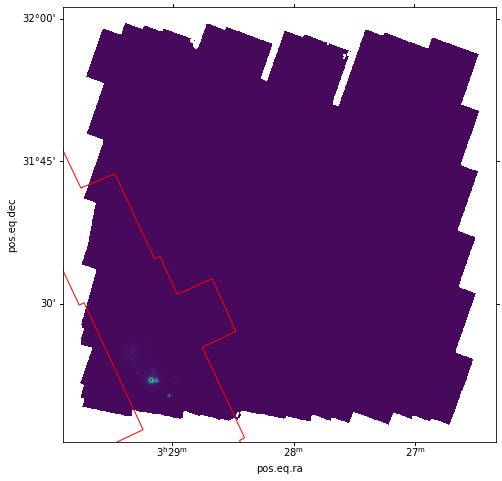

In [48]:
filepath = "C:\\Users\\alexf\\Japan internship\\Spitzer\\Super_mosaic-MIPS_240-part1\\40020261.40020261-69.MIPS.1"
obs_regiontp = pyregion.open('C:\\Users\\alexf\Japan internship\\TP_13CO_region.REG')
current_cube = fits.open(f"{filepath}.mosaic.fits")
w = WCS(current_cube[0].header)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection=w)
r = obs_regiontp.as_imagecoord(current_cube[0].header)
ax.add_patch(r.get_mpl_patches_texts()[0][0])
im = ax.imshow(current_cube[0].data)


In [49]:
region_filter = r.get_filter()
region_mask = (region_filter.mask(current_cube[0]))

masked_data = region_mask * current_cube[0].data
fits.writeto(filename=f'{filepath}.tpmasked.fits',header=current_cube[0].header,data=masked_data,overwrite=True)